In [38]:
import numpy as np
import pandas as pd

In [39]:
# make sure xlrd is installed 
# !conda install -c anaconda xlrd

df_can = pd.read_excel('./datasets/Canada.xlsx',
                      skiprows=range(20),
                      skipfooter=2,
                      sheet_name='Canada by Citizenship')
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [40]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


In [41]:
# Cleaning the dataset to remove the columns that are not informative to us as Type, Area, REG
print(df_can.shape)

(195, 43)


In [42]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [43]:
#2. Renaming the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [44]:
#3. Let's examine the types of the columns labels are in string
all(isinstance(column, str) for column in df_can.columns)

False

In [45]:
df_can.columns = list(map(str, df_can.columns))
all(isinstance(column, str) for column in df_can.columns)

True

In [46]:
#4. Set the country names as index for quickly lookup countries using .log method

df_can.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [52]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [53]:
print('data dimensions: ', df_can.shape)

data dimensions:  (195, 38)


In [54]:
#5. Create a list of years from 1980 to 2013 this will help in plotting the data
years = list(map(str, range(1980, 2014)))
years    

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [55]:
# Visulizing Data using matplotlib

import matplotlib as mpl
import matplotlib.pyplot as plt
#using inline backend to generate the plots in the browser
%matplotlib inline

mpl.style.use('ggplot') # optimal: fot ggplot-like style

#cheking for latest version of Matplotlib
print('Matplotlib Version: ', mpl.__version__) #>2.0.0

Matplotlib Version:  2.2.2


In [56]:
# Area Plot or Stacked line plot

In [69]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head()

df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [73]:
# transpose the dataframe
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [74]:
# Area plots are stacked by default. And to produce a stacked plot all the columns
# must the either all positive or all negative vaules
# Any NaN values will defauled to 0.
# To produce an unstacked plot pass stacked=False

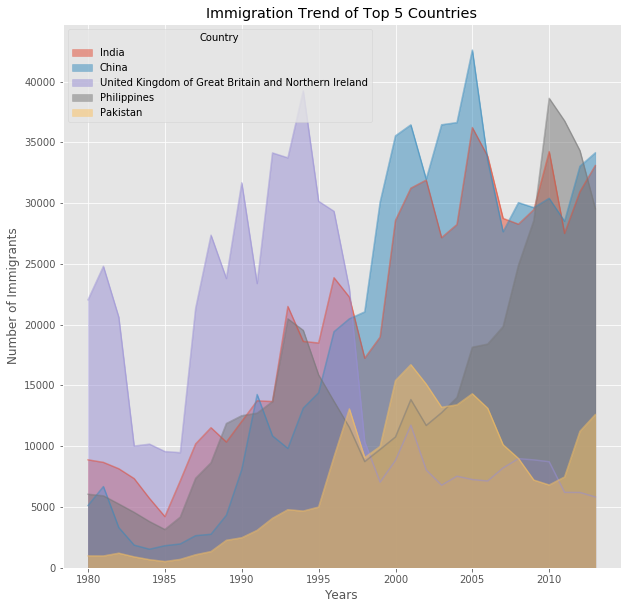

In [81]:
# let's change the index to int in order to plot

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
                stacked=False,
                figsize=(10,10)
                ) #pass a tuple of (x,y) size
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

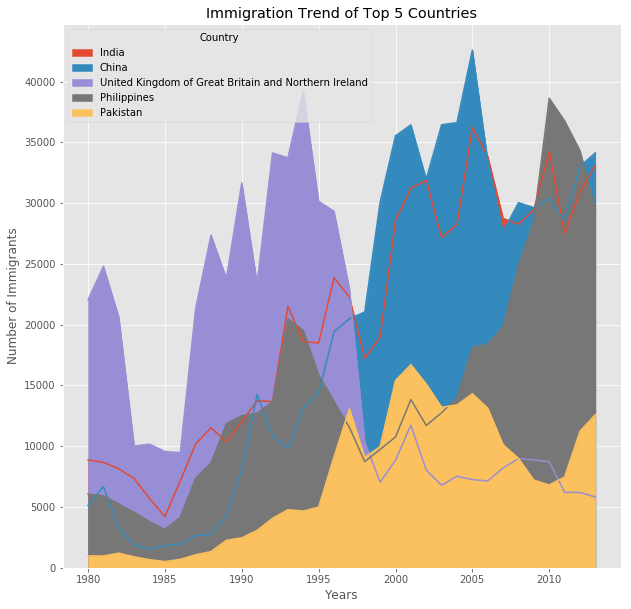

In [90]:
# The Unstacked plot has a default transparency of 0.5 let's change it pass alpha

df_top5.plot(kind='area',
                stacked=False,
                figsize=(10,10),
                alpha=1)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Text(0.5,0,'Years')

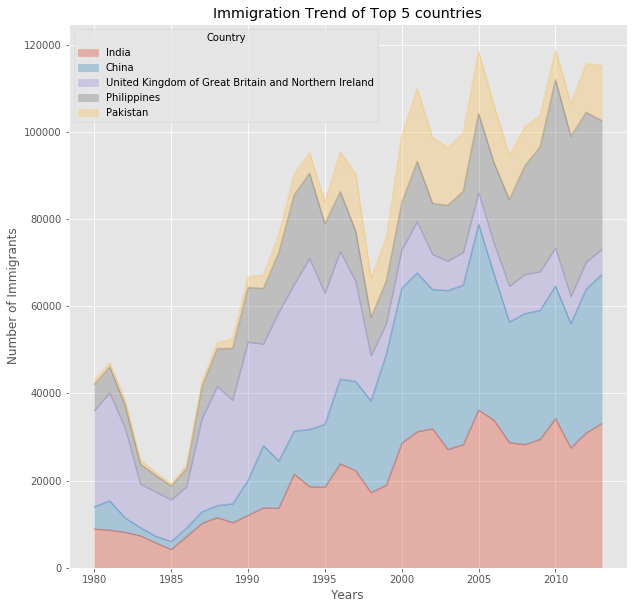

In [91]:
# Two types of plotting 



# 1. Scripting Layer (precedural -- Using matplotlib)

#     df_top5.plot(kind='area',
#                     stacked=False,
#                     figsize=(10,10),
#                     alpha=1)
#     plt.title('Immigration Trend of Top 5 Countries')
#     plt.ylabel('Number of Immigrants')
#     plt.xlabel('Years')
#     plt.show()



# 2. Artist Layer (Object oriented method)-- Using an axes instance from Matplotlib(preferred)
# sometimes this is more transparent and flexible to use for advanced plots

ax = df_top5.plot(kind='area',
                     alpha=0.35,
                     figsize=(10,10))

ax.set_title('Immigration Trend of Top 5 countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


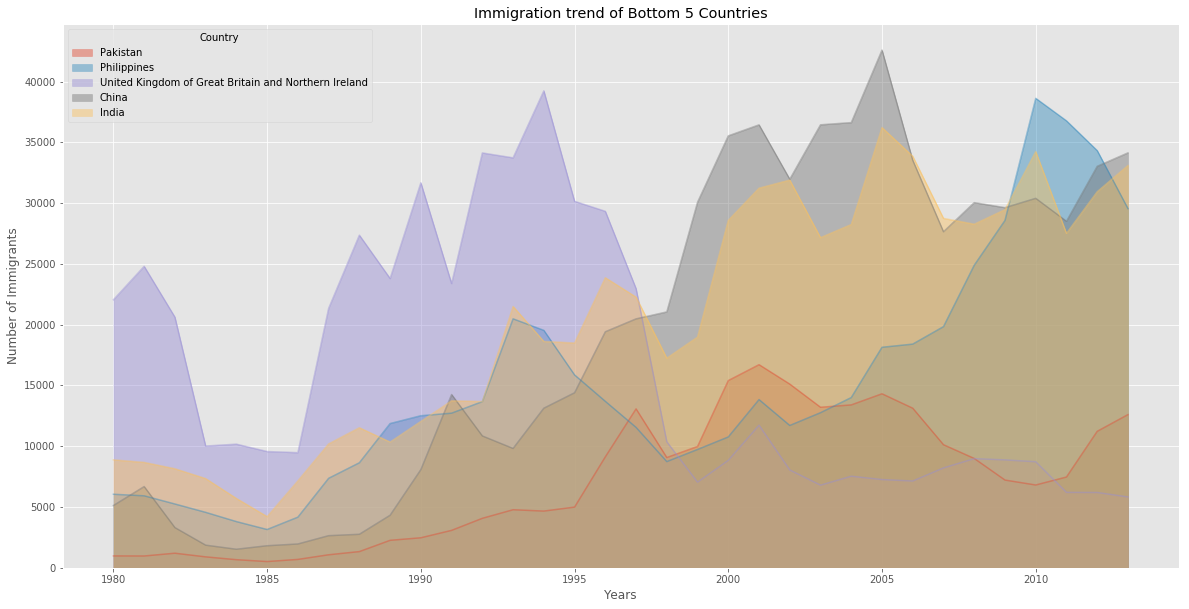

In [107]:
# Use the scripting layer to plot the plot of least 5 countries
# of the 5 countries that contributed the least to 
#immigration to Canada from 1980 to 2013.
#Use a transparency value of 0.45


df_bottom5 = df_can.tail()
a = df_can.tail()
df_bottom5 = df_bottom5[years].transpose()

# typecase index to int in order to plot
df_bottom5.index = df_bottom5.index.map(int)

# check index if indeces are in int
# all(isinstance(index, int) for index in df_bottom5.index)

#plot
df_bottom5.plot(kind='area',
                   stacked=False,
                   figsize=(20,10),
                   alpha=0.45)
plt.title('Immigration trend of Bottom 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

In [110]:
## Histograms

# A histogram is a way of representing the 'frequency' distribution
# of numeric dataset.
# The Way is works is it partitions the x-axis into bins, assigns
# each data point to a bin, and then counts the number of data points
# that have been assigned to each bin.
# So the y-axis is the frequency or the number of data points in each bin.
# Note that we can change the bin size and usually one needs to tweak it so that 
# the distribution is displayed nicely

# Question: What is the frequency distribution of the number (population) of new immigrants
# from the various countries to Canada in 2013?
df_can['2013'].head()

Country
Palau               0
Western Sahara      0
Marshall Islands    0
New Caledonia       2
San Marino          0
Name: 2013, dtype: int64

In [112]:
# use numpy's histogram method to get the bin ranges and frequecy counts

count, bin_edges = np.histogram(df_can['2013'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


In [113]:
#By default histogram break up the dataset into 10 bins
#Exploring the bin_edges and count ---
#     1. 178 countries contributed 0 to 3412.9 immigrants
#     2. 11 countries contributed 3412.0 to 6825.8 immigrants
#     3. 1 country contributed between 6825.8 to 10238.7 immigrants

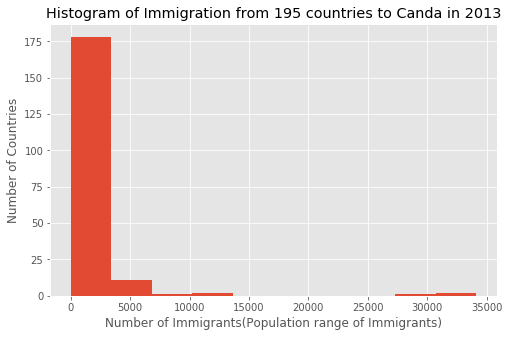

In [115]:
# Plotting the hist plot
df_can['2013'].plot(kind='hist',
                        figsize=(8,5))
plt.title('Histogram of Immigration from 195 countries to Canda in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants(Population range of Immigrants)')
plt.show()

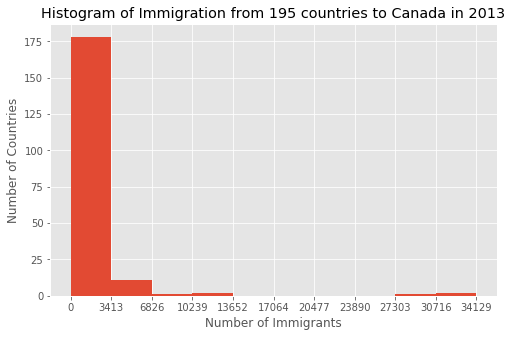

In [117]:
# Note that x-axis labels do not match with the bin size.
# To fix that pass 'xtics' keyword that contains the list of the bin size 

# 'bin_edges' a list of bin intervals

count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries to Canada in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

In [118]:
# We can also plot multiple histograms on the same plot. For example,
# let's try to answer the following questions using a histogram.

# Question: What is the immigration distribution for
# Denmark, Norway, and Sweden for years 1980 - 2013?

In [122]:
df_can.loc[['Denmark', 'Norway','Sweden'], years]



,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


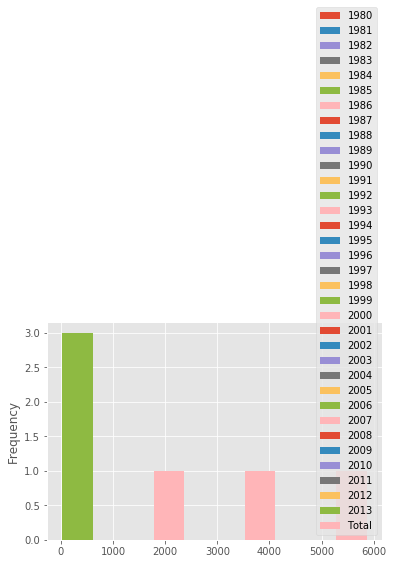

In [124]:
df_can.loc[['Denmark', 'Norway', 'Sweden']].plot(kind='hist')

In [125]:
# Instead of plotting the population frequency distribution 
# of the population for the 3 countries, pandas instead
# plotted the population frequency distribution for the years.

In [127]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


Text(0.5,0,'Number of Immigrants')

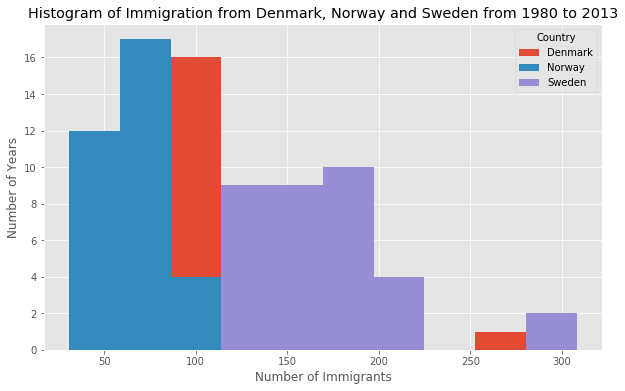

In [129]:
df_t.plot(kind='hist',
             figsize=(10,6))
plt.title('Histogram of Immigration from Denmark, Norway and Sweden from 1980 to 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')